<a href="https://colab.research.google.com/github/Shohjahon02/first_my_git/blob/main/05_ml_09_scikit_SimpleLinearRegression_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning. 

### Amaliyot. Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


Yuqoridagi jadvalda MohirDev MChJ tomonidan turli OAV larda (`TV`, `Radio`, `Newspaper`) berilgan reklamalar soni va mos keluvchi savdolar (`Sales`) berilgan.

Sizning vazifangiz:
1. Aynan qaysi turdagi OAVda reklama berish savdo o'sishiga ta'sir qiladi aniqlash
2. Topilgan bog'liqlik asosida Simple Linear Regression algorithmi yordamida bashorat modelini qurish.

Ushbu amaliyotda sizning vazifangiz berilgan dataset yordamida Simple Linear Regression model yaratish: 
- CRISP-DM metodologiyasiga amal qiling!
- Simple linear regression qo'llash uchun 1 ta ustunni tanlab oling.

In [9]:
df.corrwith(df['Sales'].sort_values(ascending=False))

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
dtype: float64

In [10]:
df.shape

(200, 4)

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.1, random_state=42)

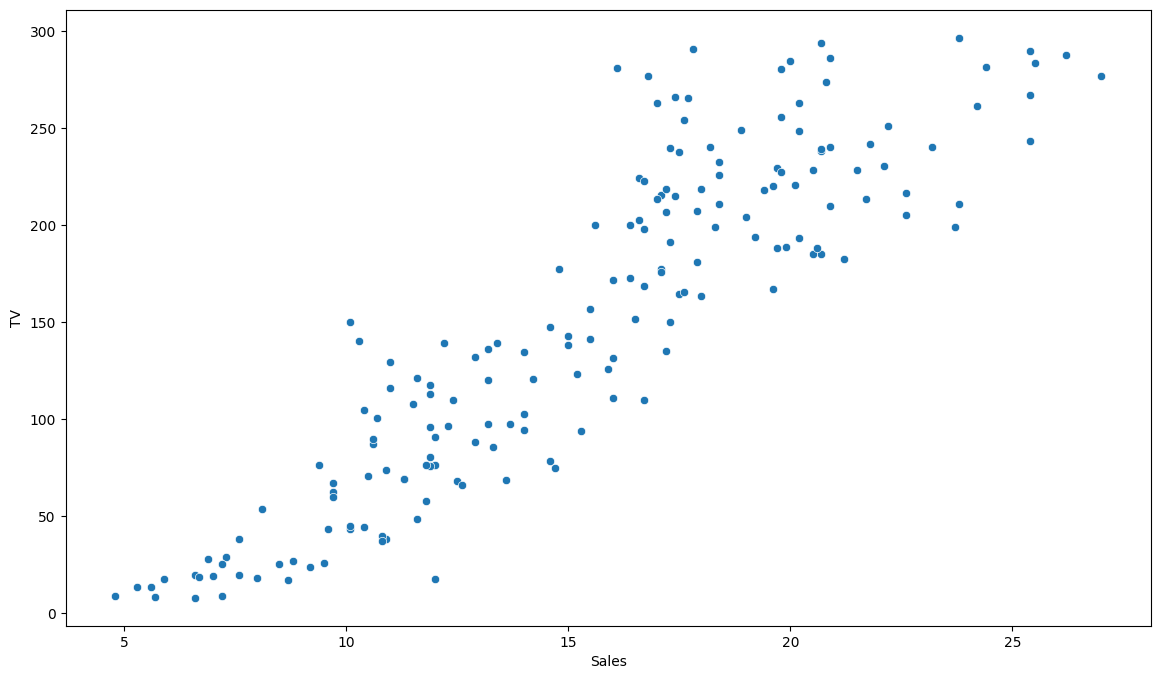

In [31]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=train_set, x='Sales', y='TV')
plt.show()

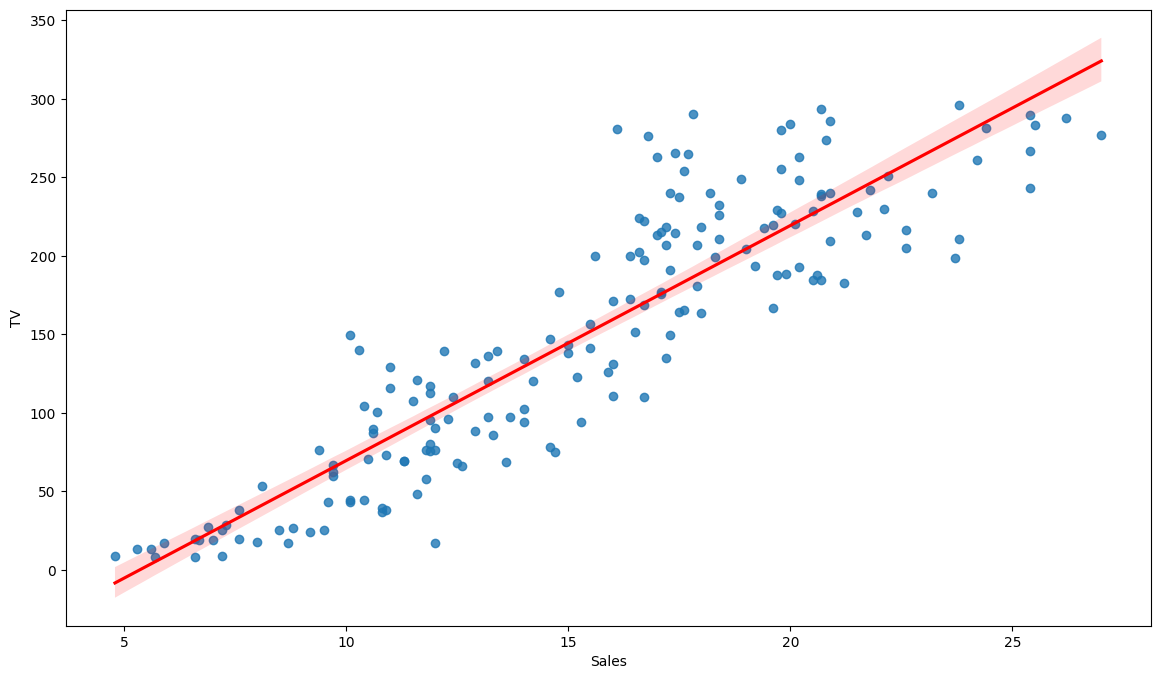

In [30]:
plt.figure(figsize=(14, 8))
sns.regplot(data=train_set, x='Sales', y='TV', line_kws={'color':"red"})
plt.show()

In [22]:
idx = train_set[train_set['Sales']<4].index
train_set.drop(idx, inplace=True)

In [24]:
train_set[train_set['Sales']<4]

,TV,Radio,Newspaper,Sales


In [27]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz 
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=0.05401909548483561
theta0=7.265159367639685


Text(0, 0.5, 'Sales')

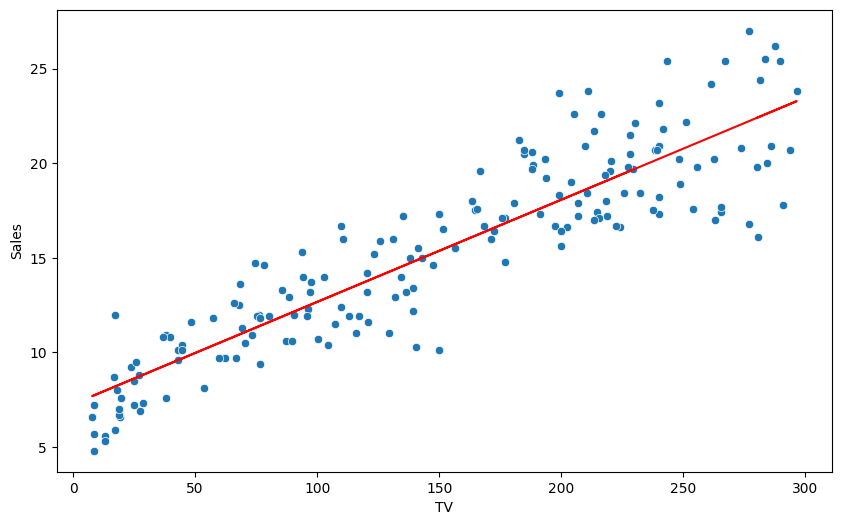

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train_set, x='TV', y='Sales')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("TV")
plt.ylabel("Sales")

In [33]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

In [34]:
y_predict = LR_model.predict(x_test)

In [38]:
y_test

array([[16.9],
       [22.4],
       [21.4],
       [ 7.3],
       [24.7],
       [12.6],
       [22.3],
       [ 8.4],
       [16.5],
       [16.1],
       [11. ],
       [ 8.7],
       [16.9],
       [ 5.3],
       [10.3],
       [16.7],
       [ 5.5],
       [16.6],
       [11.3],
       [18.9]])

In [39]:
y_predict

array([[16.08647766],
       [17.82049063],
       [23.08735244],
       [ 7.89718278],
       [19.1655661 ],
       [11.32199344],
       [18.97649927],
       [ 9.96611414],
       [19.2790062 ],
       [16.72390299],
       [ 8.96676088],
       [10.30103253],
       [19.93263726],
       [ 7.55686248],
       [14.80082319],
       [16.45920942],
       [ 7.65949876],
       [17.93933264],
       [11.33279726],
       [20.08929264]])

In [ ]:
pd.DataFrame({'Prognoz':y_predict, 'Real baxosi': y_test})

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=2.05844189595468
RMSE=2.5287060232922407
